In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://fbref.com/en/comps/Big5/Big-5-European-Leagues-Stats'

# Read the html table from the url
df = pd.read_html(url, attrs={'id':'big5_table'})[0]

In [3]:
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,es ESP,1,12,11,0,1,40,11,...,33,2.75,30.6,13.3,17.3,1.44,L W W W W,46381.0,Robert Lewandowski - 14,Iñaki Peña
1,2,Paris S-G,fr FRA,1,10,8,2,0,29,8,...,26,2.60,27.4,8.3,19.1,1.91,W D W W W,46898.0,Bradley Barcola - 8,Gianluigi Donnarumma
2,3,Bayern Munich,de GER,1,9,7,2,0,32,7,...,23,2.56,21.5,6.0,15.5,1.72,D D W W W,75000.0,Harry Kane - 11,Manuel Neuer
3,4,Liverpool,eng ENG,1,10,8,1,1,19,6,...,25,2.50,18.1,8.0,10.0,1.00,W W W D W,60263.0,Mohamed Salah - 7,Alisson
4,5,Manchester City,eng ENG,2,10,7,2,1,21,11,...,23,2.30,19.9,10.8,9.1,0.91,D W W W L,52800.0,Erling Haaland - 11,Ederson


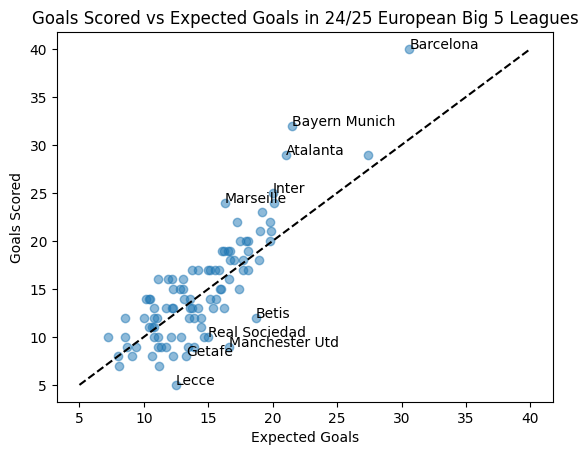

In [ ]:
# Creates a figure (fig) and a set of subplots (ax). plt.subplots() is used here to initialise the plotting area where all visual elements will be added.
fig, ax = plt.subplots()

# Creates a scatter plot using the xG and GF columns from the DataFrame. The alpha parameter is set to 0.5 to make the points slightly transparent.
ax.scatter(df['xG'], df['GF'], alpha=0.5)

# Sets the x-axis label to 'Expected Goals' using the set_xlabel() method.
ax.set_xlabel('Expected Goals')
ax.set_ylabel('Goals Scored')
ax.set_title('Goals Scored vs Expected Goals in 24/25 European Big 5 Leagues')

# Adds a dashed line to the plot to represent the 1:1 relationship between expected goals and goals scored.
ax.plot([5, 40], [5, 40], color='black', linestyle='--')

# Adds a text label to the plot at the specified coordinates (20, 20) with the text '1:1 Relationship'.
df['difference'] = df['GF'] - df['xG']

# Creates a new column in the DataFrame called 'difference' that calculates the difference between goals scored (GF) and expected goals (xG).
overperformers = df.nlargest(5, 'difference')
underperformers = df.nsmallest(5, 'difference')

# Creates two new DataFrames: one containing the top 5 overperforming teams based on the difference between goals scored and expected goals, and one containing the bottom 5 underperforming teams.
for i in range(5):
    ax.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['GF'], overperformers.iloc[i]['Squad'])
    ax.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['GF'], underperformers.iloc[i]['Squad'])

Based on the above scatterplot, we can see that Barcelona, Bayern, Atalanta, Inter and Marseille are the biggest overperforming teams, in contrast, we can see that Betis, Sociedad, Manchester United, Getafe and Lecce are the biggest underperforming teams so far in the 2024/24 season across the top 5 leagues.
